### **Análise dos dados**

Segue abaixo a análise dos dados inicialmente fornecidos.

Imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

Inicializando os dados

In [58]:
df_resultados = pd.read_csv('../data/RESULTADOS_04_06_2024_full_teste.csv', compression='gzip')
df_resultados2 = pd.read_csv('../data/RESULTADOS_02_03_2024_full_teste.csv', compression='gzip')
df_resultados3 = pd.read_csv('../data/RESULTADOS_06_2023_07_2023_full_teste.csv' ,compression='gzip')
df_falhas = pd.read_csv('../data/FALHAS_04_05_06_2024.csv')

Checando os dados

In [59]:
# Remover coluna errada
df_resultados = df_resultados.drop(columns=['Unnamed: 0'], axis=1)
df_resultados2 = df_resultados2.drop(columns=['Unnamed: 0'], axis=1)
df_resultados3 = df_resultados3.drop(columns=['Unnamed: 0'], axis=1)



In [60]:
df_falhas = df_falhas.drop(columns=['Unnamed: 0'], axis=1)

Arrumando os dados de falha pois o nome da coluna ficou nas primeiras linhas

In [61]:
df_falhas.columns = df_falhas.iloc[0]

df_falhas = df_falhas.drop(df_falhas.index[0])

Checar ambos DFs

In [62]:
df_falhas.head()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
1,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PARALAMA DIANTEIRO 01. AMASSADO,20/5/2024 21:31:52
2,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PORTA TRASEIRA 04. CAROÇO / PICO,20/5/2024 21:30:23
3,2023-2056234,T-CROSS,2R2R,DHS,PCEQS620,2058570,ZP6,MÓDULO DO ACC (13) PEÇA INCORRETA ¨,20/5/2024 20:04:56
4,2023-2056234,T-CROSS,2R2R,DHS,PCEQS999,2087715,ESPC,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA,11/4/2024 12:15:40
5,2023-3896001,T-CROSS,0Q0Q,,HCEQS203,2043971,ZP5A,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA,5/6/2024 17:38:52


Analisando os tipos de dados de falhas

In [63]:
df_falhas.describe()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
count,328901,328901,328901,328901,328891,328891,328106,328901,328901
unique,23972,1,11,5,61,366,27,4778,164880
top,2024-1746005,T-CROSS,K2K2,DHS,HCEQS506,FHQWRAP,ZP7,PAINEL LATERAL 05. SUJEIRA NA PINTURA,7/6/2024 15:07:27
freq,94,328901,86931,194962,153670,19299,86585,13146,10


In [64]:
df_resultados.head(20)

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
0,2023-2056234,012001,1,10,NaN,NaN,NaN,2024-05-16 13:41:25
1,2023-2056234,012002,1,10,NaN,NaN,NaN,2024-05-16 14:12:35
2,2023-2056234,012003,1,10,NaN,NaN,NaN,2024-05-16 14:12:27
3,2023-2056234,012004,1,10,NaN,NaN,NaN,2024-05-16 14:11:07
4,2023-2056234,012008,1,10,NaN,NaN,NaN,2024-05-16 14:13:07
5,2023-2056234,018001,1,10,NaN,NaN,NaN,2024-05-16 14:02:19
6,2023-2056234,042000,1,10,Deg,5.0,15601 ...,2024-05-16 13:21:03
7,2023-2056234,042000,1,10,mm,3.0,1.69 ...,2024-05-16 13:21:03
8,2023-2056234,042000,1,10,mm,2.0,1.98 ...,2024-05-16 13:21:03
9,2023-2056234,042000,1,10,mm,1.0,3.67 ...,2024-05-16 13:21:03


### Análise de Dados para Modelo de Falhas em Veículos

Após a análise dos dados, foram feitas as seguintes seleções para o treinamento e teste do modelo:

#### Falhas
- **Colunas a serem utilizadas:**
  - `KNR`: Identificação do veículo.
  - `FALHA`: Indicação da ocorrência da falha.
- **Motivo:** As demais colunas são únicas para os veículos que tiveram falhas e não estão presentes na tabela de `RESULTADOS`. Incluir essas colunas poderia causar viés no modelo.

#### Resultados
- **Colunas a serem descartadas:**
  - `UNIT`
  - `VALUE_ID`
  - `VALUE`
- **Motivo:** Essas colunas não serão utilizadas na análise inicial, mas podem ser incluídas futuramente para melhorar a acurácia e o recall do modelo.

#### Observações Futuras
- **Coluna `Data` da tabela FALHAS:** Pode ser explorada futuramente para criar novas features.

Essa abordagem foi adotada para garantir que o modelo seja treinado e testado com dados que não introduzam viés, permitindo uma análise mais objetiva e confiável.


## Preparação dos dados

Inicialmente, os dados serão integrados em uma única tabela

In [65]:
# Remoção das linhas com NaN

df_falhas = df_falhas.dropna()
df_resultados = df_resultados.dropna()
df_resultados2 = df_resultados2.dropna()
df_resultados3 = df_resultados3.dropna()

In [66]:
df_resultados.head()

,KNR,NAME,ID,STATUS,UNIT,VALUE_ID,VALUE,DATA
6,2023-2056234,042000,1,10,Deg,5.0,15601 ...,2024-05-16 13:21:03
7,2023-2056234,042000,1,10,mm,3.0,1.69 ...,2024-05-16 13:21:03
8,2023-2056234,042000,1,10,mm,2.0,1.98 ...,2024-05-16 13:21:03
9,2023-2056234,042000,1,10,mm,1.0,3.67 ...,2024-05-16 13:21:03
10,2023-2056234,042000,1,10,Nm,4.0,2.93 ...,2024-05-16 13:21:03


Convertendo a coluna DATA para um formato melhor

In [67]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19717629 entries, 6 to 21674251
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   KNR       object 
 1   NAME      object 
 2   ID        int64  
 3   STATUS    int64  
 4   UNIT      object 
 5   VALUE_ID  float64
 6   VALUE     object 
 7   DATA      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ GB


In [68]:
# Salvando os dados em "parquet" é mais rápido para leitura

df_resultados.to_parquet('../data/df_resultados.parquet', index=False)
df_resultados2.to_parquet('../data/df_resultados2.parquet', index=False)
df_resultados3.to_parquet('../data/df_resultados3.parquet', index=False)

In [69]:
# Limpando colunas que não serão usadas agora

colunas = ['UNIT', 'VALUE_ID', 'VALUE']

df_resultados2 = df_resultados2.drop(columns=colunas, axis=1)
df_resultados = df_resultados.drop(columns=colunas, axis=1)
df_resultados3 = df_resultados3.drop(columns=colunas, axis=1)

In [70]:
# Transformando os DFs de resultados em apenas um DF de resultados maior

df = pd.concat([df_resultados, df_resultados2, df_resultados3])

In [71]:
# Transformando data em datetime do pandas

df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

Segue abaixo o código para a preparação dos dados

In [72]:
def aggregate_by_id(df, id_value):
    subset = df[df['ID'] == id_value]
    return subset.groupby('KNR').agg(
        NAME=('NAME', 'count'),  # Conta total de NAME
        SOK=('STATUS', lambda x: (x == 10).sum()),
        SNOK=('STATUS', lambda x: (x == 13).sum()),
        DATA=('DATA', lambda x: (x.max() - x.min()).total_seconds() / (3600*24))
    ).rename(columns={
        'NAME': f'ID{id_value}NAME',
        'SOK': f'ID{id_value}SOK',
        'SNOK': f'ID{id_value}SNOK',
        'DATA': f'ID{id_value}DATA'
    })

# Agregando para cada ID
id1 = aggregate_by_id(df, 1)
id2 = aggregate_by_id(df, 2)
id718 = aggregate_by_id(df, 718)

# Combinando os resultados em um único DataFrame
final_df = id1.join(id2, on='KNR', how='outer').join(id718, on='KNR', how='outer').reset_index()

# Reordenando as colunas para o formato desejado
final_df = final_df[['KNR','ID1NAME', 'ID1SOK', 'ID1SNOK', 'ID1DATA', 'ID2NAME', 'ID2SOK', 'ID2SNOK', 'ID2DATA', 'ID718NAME', 'ID718SOK', 'ID718SNOK', 'ID718DATA']]

# Exibindo o resultado
print(final_df)

                KNR  ID1NAME  ID1SOK  ID1SNOK  ID1DATA  ID2NAME  ID2SOK  \
0      2023-2016173      NaN     NaN      NaN      NaN     12.0    12.0   
1      2023-2026098      NaN     NaN      NaN      NaN      8.0     8.0   
2      2023-2026162      NaN     NaN      NaN      NaN      8.0     8.0   
3      2023-2026175      NaN     NaN      NaN      NaN      8.0     8.0   
4      2023-2026215      NaN     NaN      NaN      NaN      8.0     8.0   
...             ...      ...     ...      ...      ...      ...     ...   
49186  2024-2976009      NaN     NaN      NaN      NaN     72.0    72.0   
49187  2024-2976010      NaN     NaN      NaN      NaN     72.0    72.0   
49188  2024-2976011      NaN     NaN      NaN      NaN     74.0    74.0   
49189  2024-2976012      NaN     NaN      NaN      NaN     82.0    82.0   
49190  2024-2976013      NaN     NaN      NaN      NaN     72.0    72.0   

       ID2SNOK   ID2DATA  ID718NAME  ID718SOK  ID718SNOK  ID718DATA  
0          0.0  0.000231     

In [73]:
# Colocar 0 no lugar de NaN para evitar problemas
final_df = final_df.fillna(0)

In [74]:
final_df.head(10)

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA
0,2023-2016173,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.000231,2.0,1.0,1.0,0.00331
1,2023-2026098,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000012,1.0,1.0,0.0,0.00000
2,2023-2026162,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000058,1.0,1.0,0.0,0.00000
3,2023-2026175,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000069,1.0,1.0,0.0,0.00000
4,2023-2026215,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000058,1.0,1.0,0.0,0.00000
5,2023-2026304,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.000694,1.0,1.0,0.0,0.00000
6,2023-2026353,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.000035,1.0,1.0,0.0,0.00000
7,2023-2026405,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000150,1.0,1.0,0.0,0.00000
8,2023-2026414,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.000544,1.0,1.0,0.0,0.00000
9,2023-2036003,0.0,0.0,0.0,0.0,10.0,10.0,0.0,16.120174,1.0,1.0,0.0,0.00000


In [75]:
# Checar o tamanho do DataFrame

final_df.shape

(49191, 13)

Arrumando o DF de Falhas


In [76]:
# Deixa todas as falhas em letra maiuscula
df_falhas['FALHA'] = df_falhas['FALHA'].str.upper()

In [77]:
# Checa o DataFrame
df_falhas.head()

,KNR,MODELO,COR,MOTOR,ESTACAO,USUARIO,HALLE,FALHA,DATA
1,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PARALAMA DIANTEIRO 01. AMASSADO,20/5/2024 21:31:52
2,2023-2056234,T-CROSS,2R2R,DHS,HCEQS506,4013334,ZP7,PORTA TRASEIRA 04. CAROÇO / PICO,20/5/2024 21:30:23
3,2023-2056234,T-CROSS,2R2R,DHS,PCEQS620,2058570,ZP6,MÓDULO DO ACC (13) PEÇA INCORRETA ¨,20/5/2024 20:04:56
4,2023-2056234,T-CROSS,2R2R,DHS,PCEQS999,2087715,ESPC,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA,11/4/2024 12:15:40
5,2023-3896001,T-CROSS,0Q0Q,,HCEQS203,2043971,ZP5A,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA,5/6/2024 17:38:52


In [78]:
# Removendo as colunas que não serão utilizadas na predição

colunas_to_remove = ['MODELO', 'COR', 'MOTOR', 'ESTACAO', 'USUARIO', 'HALLE', 'DATA']

df_falhas = df_falhas.drop(columns=colunas_to_remove, axis=1)

In [107]:
# Remove todas as linhas com KNR repetido
df_falhas_unique = df_falhas.drop_duplicates(subset=['KNR'])

# Checa o DataFrame
df_falhas_unique.head()


,KNR,FALHA
1,2023-2056234,PARALAMA DIANTEIRO 01. AMASSADO
5,2023-3896001,TAMPA DIANTEIRA 05. SUJEIRA NA PINTURA
7,2023-4896002,TETO 05. SUJEIRA NA PINTURA
8,2024-0576008,FAROL (09) PEÇA NOK
10,2024-0576017,TAMPA TRASEIRA 05. SUJEIRA NA PINTURA


In [80]:
# Muda os valores da coluna de Falha para 1
df_falhas_unique['FALHA'] = 1

/var/folders/n4/4rgmfhrx7cx7pqx4s9zv_99r0000gn/T/ipykernel_85607/727693188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_falhas_unique['FALHA'] = 1


In [81]:
# Checa o DataFrame
df_falhas_unique.head()

,KNR,FALHA
1,2023-2056234,1
5,2023-3896001,1
7,2023-4896002,1
8,2024-0576008,1
10,2024-0576017,1


Dando merge do Falhas com Resultado

In [82]:
# Realizando o merge dos dataframes df_falhas e final_df com base na coluna 'KNR'
merged_df = pd.merge(final_df, df_falhas_unique, on='KNR', how='left')

In [83]:
# Analisa o tamanho do DF final
merged_df.shape

(49191, 14)

In [84]:
# Adiciona 0 em todos os NaN
merged_df = merged_df.fillna(0)

In [85]:
merged_df.head()

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2016173,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.000231,2.0,1.0,1.0,0.00331,0.0
1,2023-2026098,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000012,1.0,1.0,0.0,0.00000,0.0
2,2023-2026162,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000058,1.0,1.0,0.0,0.00000,0.0
3,2023-2026175,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000069,1.0,1.0,0.0,0.00000,0.0
4,2023-2026215,0.0,0.0,0.0,0.0,8.0,8.0,0.0,0.000058,1.0,1.0,0.0,0.00000,0.0


Normalização e treinamento do modelo

In [86]:
# Selecionando apenas as colunas específicas para normalização
cols_to_normalize = ['ID1NAME','ID1SOK', 'ID1SNOK', 'ID1DATA', 'ID2NAME', 'ID2SOK', 'ID2SNOK', 'ID2DATA', 'ID718NAME', 'ID718SOK', 'ID718SNOK', 'ID718DATA']

# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Aplicando a normalização
merged_df[cols_to_normalize] = scaler.fit_transform(merged_df[cols_to_normalize])

# Exibindo o dataframe normalizado
merged_df.head()

,KNR,ID1NAME,ID1SOK,ID1SNOK,ID1DATA,ID2NAME,ID2SOK,ID2SNOK,ID2DATA,ID718NAME,ID718SOK,ID718SNOK,ID718DATA,FALHA
0,2023-2016173,0.0,0.0,0.0,0.0,0.010733,0.010791,0.0,3.736757e-06,0.005038,0.003546,0.004405,0.000047,0.0
1,2023-2026098,0.0,0.0,0.0,0.0,0.007156,0.007194,0.0,1.868379e-07,0.002519,0.003546,0.000000,0.000000,0.0
2,2023-2026162,0.0,0.0,0.0,0.0,0.007156,0.007194,0.0,9.341893e-07,0.002519,0.003546,0.000000,0.000000,0.0
3,2023-2026175,0.0,0.0,0.0,0.0,0.007156,0.007194,0.0,1.121027e-06,0.002519,0.003546,0.000000,0.000000,0.0
4,2023-2026215,0.0,0.0,0.0,0.0,0.007156,0.007194,0.0,9.341893e-07,0.002519,0.003546,0.000000,0.000000,0.0


In [ ]:
# Caso seja necessário utilizar um arquivo csv com os dados tratados (como no notebook do modelo principal), rodar o seguinte comando, que cria um arquivo csv com o tratamento feito até agora
# df.to_csv('preparacao_modelo_1.csv', index=False)

## Primeira versão do Modelo Yes or No utilizando KNN

O objetivo do modelo "Yes or No" é prever apenas se o carro no final da 
linha de produção irá apresentar falha ou não, sem se preocupar em apontar qual tipo de falha especificamente. Para uma primeira aplicação, foi utilizado um modelo KNN (linear) de classificação, que pode ser visto abaixo. 

Para visualizar a contrução de novos modelos e a iteração deles, veja o notebook *"modelo_Yes_or_No.ipynb"*.

In [87]:
# Separando as features (X) e o target (y)
X = merged_df.drop(columns=['FALHA', 'KNR'])  # 'KNR' é apenas um identificador, então deve ser removido
y = merged_df['FALHA']

In [88]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Inicializando o classificador KNN
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [106]:
# Performance no conjunto de treinamento
train_predictions = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Performance no conjunto de teste
test_predictions = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Acurácia no Treinamento:", train_accuracy)
print("Acurácia no Teste:", test_accuracy)

Acurácia no Treinamento: 0.8882140678999797
Acurácia no Teste: 0.8575058440898465


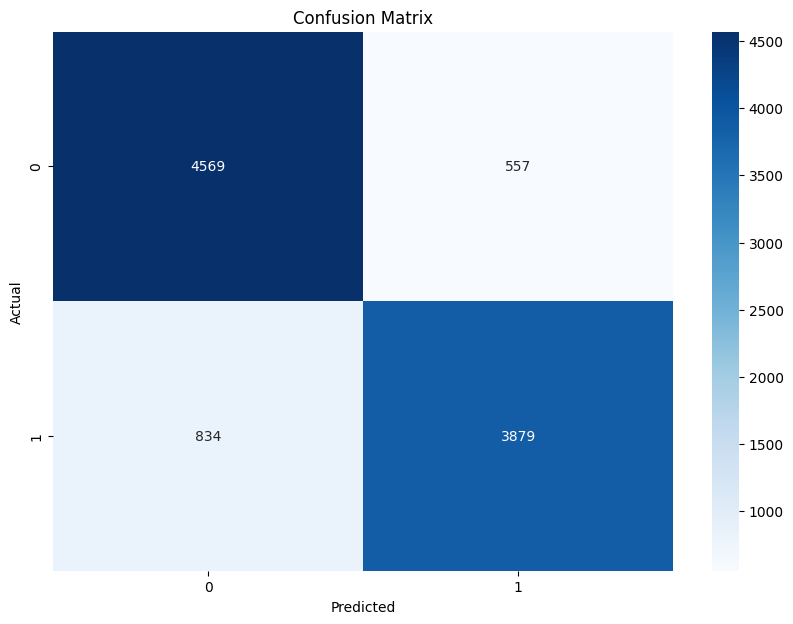

In [91]:
# Gerar a matriz
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plotar a matriz
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [92]:
# Analisa quantos valores são 1 e quantos 0 das falhas
print(y_train.value_counts())

FALHA
0.0    20518
1.0    18834
Name: count, dtype: int64
